# Normalized Vegetation Index (NDVI)

The Normalized Difference Vegetation Index (NDVI) quantifies vegetation by measuring the difference between near-infrared **nir** (which vegetation strongly reflects) and **red** light (which vegetation absorbs). NDVI always ranges from -1 to +1.

* **Negative Values:** It is most likely water.
* **Values Close to 1:** There is a high possibility that they are dense green leaves.
* **Values Close to 0:** There are no green leaves and it could even be an urbanized area.

<img src="img/ndvi_example.png" alt="Drawing" style="width: 400px;"/>

## Content

1. Imports
2. Query the Open Data Cube
3. NDVI Calculation
4. Save analysis results in a GeoTIFF

## 1. Imports

In [1]:
# Open data cube API
import datacube

# Multi-dimentional arrays data
import xarray as xr

# Plotting
import matplotlib as mpl
import matplotlib.pyplot as plt

# Disable notebook warnings
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [2]:
datacube.__version__

'1.8.3'

## 2. Query the Open Data Cube

In [3]:
# Set a datacube app name, this name will be used for debugging purposes
dc = datacube.Datacube(app="ndvi_app")

dataset = dc.load(
    # Set the product identifier 
    product = "s2_sen2cor_ard_granule_EO3",
    
    # Set the study area (bounding box in degrees)
    longitude = (-73.000, -72.83944000000001),
    latitude = (5.4521500000000005, 5.65215),
    
    # Coordinate reference system of lalitude and longitude
    crs="EPSG:4326",    
    
    # The query returns images whose acquisition date is in the 
    # specified range
    # Time format (YYYY-MM-DD)
    time=('2021-01-01', '2021-01-30'),
    
    # Specify the spectral information you require for your analysis
    measurements=["red","blue","green","nir","scl"],
    
    # Coordinate reference system of the data returned by the query
    output_crs="EPSG:4326",
    
    # Pixel resulution (in degrees) according to 'output_crs'
    resolution=(-0.00008983111,0.00008971023)
)

dataset

<xarray.Dataset>
Dimensions:      (latitude: 2227, longitude: 1791, time: 2)
Coordinates:
  * time         (time) datetime64[ns] 2021-01-15T17:44:59 2021-01-30T17:40:15
  * latitude     (latitude) float64 5.652 5.652 5.652 ... 5.452 5.452 5.452
  * longitude    (longitude) float64 -73.0 -73.0 -73.0 ... -72.84 -72.84 -72.84
    spatial_ref  int32 4326
Data variables:
    red          (time, latitude, longitude) uint16 935 686 345 ... 459 445 397
    blue         (time, latitude, longitude) uint16 633 446 170 ... 207 223 180
    green        (time, latitude, longitude) uint16 960 808 298 ... 449 430 402
    nir          (time, latitude, longitude) uint16 3278 3351 1795 ... 2135 2202
    scl          (time, latitude, longitude) uint8 4 4 4 4 4 4 4 ... 4 4 4 4 4 4
Attributes:
    crs:           EPSG:4326
    grid_mapping:  spatial_ref

### Features of the returned dataset

The `dc.load` function returns a data structure form the `xarray.Dataset` class. This data structure contains all the information that was requested in the query. This `xarray.Dataset` has the following properties:

**Dimensions**

The dimensions identify the number of observations in time returned by the search (`time: 1`  or `time: 2`) as well as the number of pixels in the` latitude` and `longitude` dimensions. In addition, it indicates the shape of the data.

**Coordinates**

* `time` identifies the date attributed to each time period returned as a result of the query.
* `latitude` and` longitude` are the coordinates of each pixel within the spatial extent defined in the query.

**Data variables**

For every band (*measurement*) representing the spectral information of the image, there is a *data variable*. In the above example, the data variables obtained are: `red`,`blue`, `green`,`nir`, and `scl`. Each data variable is a three-dimensional array which belongs to the  `xarray.DataArray` class. 

**Attributes**

Includes the image metadata, for example, the `crs` that identifies the data coordinate reference system. 

### True color image (R,G,B) of the time serie

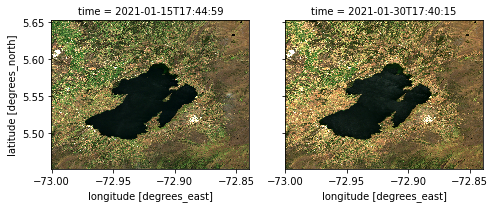

In [4]:
rgb = dataset[["red","green","blue"]].to_array(dim='color')
rgb = rgb.transpose(*(rgb.dims[1:]+rgb.dims[:1]))  # make 'color' the last dimension
img = rgb.plot.imshow(col='time',col_wrap=2,add_colorbar=False,vmin=0,vmax=1500)

### Blue band time serie 

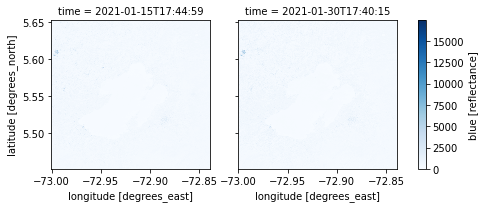

In [5]:
dataset.blue.plot(col='time',col_wrap=2,cmap='Blues')

### Explore dataset dimentions

In [6]:
dataset.dims

Frozen(SortedKeysDict({'time': 2, 'latitude': 2227, 'longitude': 1791}))

### Explore dataset coordinates

All the data variables in the dataset share the same coordinates, that is, all of them have the same shape.

In [7]:
dataset.coords

Coordinates:
  * time         (time) datetime64[ns] 2021-01-15T17:44:59 2021-01-30T17:40:15
  * latitude     (latitude) float64 5.652 5.652 5.652 ... 5.452 5.452 5.452
  * longitude    (longitude) float64 -73.0 -73.0 -73.0 ... -72.84 -72.84 -72.84
    spatial_ref  int32 4326

To know explicitly what periods of time were returned by the query

In [8]:
dataset.coords['time']

<xarray.DataArray 'time' (time: 2)>
array(['2021-01-15T17:44:59.000000000', '2021-01-30T17:40:15.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time         (time) datetime64[ns] 2021-01-15T17:44:59 2021-01-30T17:40:15
    spatial_ref  int32 4326
Attributes:
    units:    seconds since 1970-01-01 00:00:00

To explicitly explore the `longitude` array

In [9]:
dataset.coords['longitude']

<xarray.DataArray 'longitude' (longitude: 1791)>
array([-73.00004 , -72.99995 , -72.999861, ..., -72.839638, -72.839548,
       -72.839459])
Coordinates:
  * longitude    (longitude) float64 -73.0 -73.0 -73.0 ... -72.84 -72.84 -72.84
    spatial_ref  int32 4326
Attributes:
    units:       degrees_east
    resolution:  8.971023e-05
    crs:         EPSG:4326

To explicitly explore the `latitude` array

In [10]:
dataset.coords['latitude']

<xarray.DataArray 'latitude' (latitude: 2227)>
array([5.652129, 5.652039, 5.651949, ..., 5.452344, 5.452254, 5.452164])
Coordinates:
  * latitude     (latitude) float64 5.652 5.652 5.652 ... 5.452 5.452 5.452
    spatial_ref  int32 4326
Attributes:
    units:       degrees_north
    resolution:  -8.983111e-05
    crs:         EPSG:4326

### Explore data variables

As mentioned above, each data variable has three dimensions, `latitude`, `longitude`, and `time`, where the **first dimenton is the `time`**.

In [11]:
time_observation = 0

dataset.blue[time_observation]

<xarray.DataArray 'blue' (latitude: 2227, longitude: 1791)>
array([[633, 446, 170, ..., 439, 441, 404],
       [650, 524, 252, ..., 466, 460, 412],
       [496, 508, 390, ..., 432, 427, 412],
       ...,
       [267, 309, 285, ..., 186, 194, 220],
       [311, 336, 264, ..., 183, 189, 190],
       [383, 406, 381, ..., 214, 206, 184]], dtype=uint16)
Coordinates:
    time         datetime64[ns] 2021-01-15T17:44:59
  * latitude     (latitude) float64 5.652 5.652 5.652 ... 5.452 5.452 5.452
  * longitude    (longitude) float64 -73.0 -73.0 -73.0 ... -72.84 -72.84 -72.84
    spatial_ref  int32 4326
Attributes:
    units:         reflectance
    nodata:        0
    crs:           EPSG:4326
    grid_mapping:  spatial_ref

### Explore a data variable at pixel level

In [12]:
time_observation = 0
latitude = 0
longitude = 0

dataset.blue[time_observation,latitude,longitude]

<xarray.DataArray 'blue' ()>
array(633, dtype=uint16)
Coordinates:
    time         datetime64[ns] 2021-01-15T17:44:59
    latitude     float64 5.652
    longitude    float64 -73.0
    spatial_ref  int32 4326
Attributes:
    units:         reflectance
    nodata:        0
    crs:           EPSG:4326
    grid_mapping:  spatial_ref

## 3. NDVI Analysis

In [13]:
dataset['ndvi'] = (dataset.nir - dataset.red) / (dataset.nir + dataset.red)
dataset

<xarray.Dataset>
Dimensions:      (latitude: 2227, longitude: 1791, time: 2)
Coordinates:
  * time         (time) datetime64[ns] 2021-01-15T17:44:59 2021-01-30T17:40:15
  * latitude     (latitude) float64 5.652 5.652 5.652 ... 5.452 5.452 5.452
  * longitude    (longitude) float64 -73.0 -73.0 -73.0 ... -72.84 -72.84 -72.84
    spatial_ref  int32 4326
Data variables:
    red          (time, latitude, longitude) uint16 935 686 345 ... 459 445 397
    blue         (time, latitude, longitude) uint16 633 446 170 ... 207 223 180
    green        (time, latitude, longitude) uint16 960 808 298 ... 449 430 402
    nir          (time, latitude, longitude) uint16 3278 3351 1795 ... 2135 2202
    scl          (time, latitude, longitude) uint8 4 4 4 4 4 4 4 ... 4 4 4 4 4 4
    ndvi         (time, latitude, longitude) float64 0.5561 0.6601 ... 0.6945
Attributes:
    crs:           EPSG:4326
    grid_mapping:  spatial_ref

In [ ]:
dataset.ndvi.plot(col='time',col_wrap=4)

In [ ]:
# Generación de máscara que establece que deseamos dejar aquellos píxeles que presentan un ndvi mayor que -1.0
mask_lower = dataset.ndvi >= -1.0

# Generación de máscara que establece que deseamos dejar aquellos píxeles que son menores que 1.0
mask_higher = dataset.ndvi <= 1.0

# Aplicamos ambas máscaras sobre todo el dataset
masked_dataset = dataset.where(mask_lower & mask_higher)

# Imágen del ndvi después de haber removido los valores inválidos para el índice
masked_dataset.ndvi.plot()